<img src="image-20240317-092012.png" width="" align="" />

<img src="image-20240317-093526.png" width="" align="" />

<img src="image-20240317-093842.png" width="" align="" />

<img src="image-20240317-094400.png" width="" align="" />

# Neural Network Classification with Pytorch

Classification is a problem  of predicting whether something is one thing or another (there can be multiple thing also)

## 1. Making classification data and get it ready

**NOTE:** The data that we are using below is also refered as toy dataset 

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_sample = 1000

x,y = make_circles(n_sample  , noise = 0.02 , random_state = 42)

In [ ]:
x[:3] , y[:3]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355]]),
 array([1, 1, 1]))

In [ ]:
import pandas as pd
dataframe = pd.DataFrame({'x1':x[:,0],'x2':x[:,1],'label':y})

In [ ]:
dataframe

,x1,x2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
...,...,...,...
995,0.241536,0.953294,0
996,-0.975298,-0.264479,0
997,-0.141235,-0.801951,1
998,0.675090,-0.754657,0


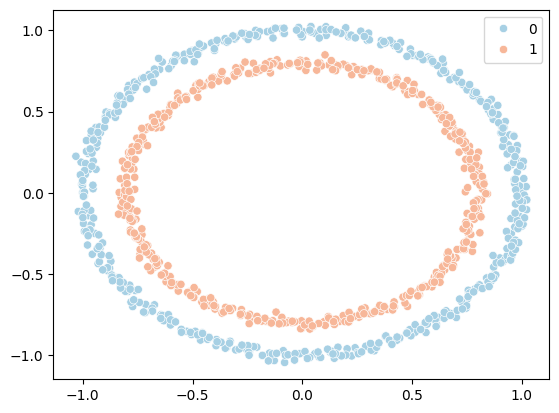

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette="RdBu_r")
plt.show()

### 1.1 Checking input and output shapes

In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
x_sample = x[0]
y_sample = y[0]

print(f"Values for the first sample x[0] is {x_sample} and its corresponding y[0] is {y_sample}")
print(f"Shape of x[0] is {x_sample.shape} and its corresponding y[0] is {y_sample.shape}")

Values for the first sample x[0] is [0.76026594 0.22387823] and its corresponding y[0] is 1
Shape of x[0] is (2,) and its corresponding y[0] is ()


### 1.2 Turn data into tensor and also creating train and test splits

In [ ]:
# Turn data into tensor
import torch

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# split data into training and testing set
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.2)

### Building a model 

Let's build a model with the following step:
* setup agnostic code for this device that we want to use
* construct the model (using `nn.Module`)
* Define loss and optimizer 
* training and testing loop

In [ ]:
# importing the lib
import torch
from torch import nn

# agnostic code for setting up the device
device = "cuda" if torch.cuda.is_available() else "cpu"

Now we've setup device agnostic code, let's create a model that:
1. Subclasses `nn. Module` (almost all models in PyTorch subclass nn. Module)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [ ]:
# Constructing a class using nn.Module subclass
import torch
from torch import nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        # creating 2 linear layer
        self.layer_1 = nn.Linear(in_features=2,out_features=5) # this layer takes 2 feature in i/p and o/p 10 to the next layer
        self.layer_2 = nn.Linear(in_features=5,out_features=1) # this layer takes 10 feature in i/p and o/p 1(because y is single scaler no) to the next layer
        self.two_linear_layers = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                                               nn.Linear(in_features=5, out_features=1))
    # defining the forward pass 
    def forward(self,x):
        # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> o/p
        return self.two_linear_layers(x)

# Instantiate an instance of our model class and send it to the target device

model_0 = CircleModel().to(device)

In [ ]:
model_1 = nn.Sequential(
    nn.Linear(2,5),
    nn.Linear(5,1)
).to(device)

#this model_1 is same as that we have created model_0

In [ ]:
with torch.inference_mode():
    untrained_preds = model_0(x_test.to(device))
print (f" Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print (f" Length of test samples: {len(x_test)}, Shape: {x_test.shape}")
print (f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print (f"\nFirst 10 labels: \n{y_test[:10]}")

 Length of predictions: 200, Shape: torch.Size([200, 1])
 Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup loss funtion and optimizer

* For Loss Function - `torch.nn.BCEwithLogitLoss()` 
* For optimizer - `torch.nn.opti.SGD() or torch.nn.optim.Adam()` 

In [ ]:
# setup loss function 
loss_fn = torch.nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() = sigmoid activation function is inbuilt
# we also can use loss_fn = nn.BCELoss() where BCELoss() = required input to gone through sigmoid 
# activation function because sigmoid is not implemented inbuilt in BCEloss() so we need to implement 
# sigmoid first


# setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters() , lr=0.01)

In [ ]:
list(model_1.named_children()) 

[('0', Linear(in_features=2, out_features=5, bias=True)),
 ('1', Linear(in_features=5, out_features=1, bias=True))]

In [ ]:
list(model_1.named_parameters()) 

[('0.weight',
  Parameter containing:
  tensor([[-0.2314, -0.4297],
          [ 0.5450, -0.1982],
          [-0.5190,  0.4231],
          [-0.3877, -0.6247],
          [ 0.0749, -0.1683]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([-0.1845,  0.3133, -0.4026, -0.4604,  0.4432], requires_grad=True)),
 ('1.weight',
  Parameter containing:
  tensor([[ 0.3147, -0.1716,  0.2785,  0.3460, -0.2801]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.2631], requires_grad=True))]

In [ ]:
# Note - # torch.eq(torch.tensor([[1,1,3],[0,0,1]]),torch.tensor([[1,2,3],[1,1,1]])).sum().item()
# this above code match tensor1 with tensor2 with equal to equation and then print how many no
# matches in the tensor

# calculate accuracy
def accuracy(y_true , y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = ((correct) / len(y_pred))*100
    return acc 

### Training Model

* `Forward pass`
* `calculate the loss`
* `optimizer.zero_grad`
* `loss backward`
* `optimizer step`

Going from raw logits -> prediction probabilities -> prediction labels
* our model o/p are going to be **logits** 
* we need to convert these **logits** into `prediction probabilities` by passing them to some kind of activation function (eg sigmoid activation in BC and softmax in MC)
* Then we can convert our model prediction to prediction labels by either rounding them or by taking argmax()

In [ ]:
# view first 5 logit based on test data
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(x_test)[:5]
y_logits , y_test[:5]

(tensor([[-0.6973],
         [-0.9156],
         [-0.3902],
         [-0.7762],
         [-0.8521]]),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
# Use sigmoid activation functions on our model logits to turn them into prediction probabilities

y_pred_sigmoid = torch.sigmoid(y_logits)
y_pred_sigmoid

tensor([[0.3324],
        [0.2859],
        [0.4037],
        [0.3151],
        [0.2990]])

In [ ]:
with torch.inference_mode():
    y_pred_label = torch.round(torch.sigmoid(model_1(x_test[:5])))

# check for equality using torch.eq()
print(torch.eq(y_pred_label.squeeze(),y_test[:5].squeeze()))

tensor([False,  True, False,  True, False])


### For our prediction probability values, we need to perform a range-style rounding on them:
• `y_pred_probs >= 0.5, y=1 (class 1)`
• `y_pred_probs < 0.5, y=0 (class 0)`

### Building a training and testing loops

In [ ]:
torch.manual_seed(42)
#torch.cuda.maunal_seed(42) -> this is used for cuda device if available

# setting up the epochs
epochs = 100

# if you have cuda available you can also use x_train.to(device) and we will do same thing with x_test , y_test
for epoch in range(epochs):
    model_1.train()

    # forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred_label = torch.round(torch.sigmoid(y_logits)) # turn logits -> prediction prob -> labels

    # calculate loss and accuray
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) -> this is to be done if we are using loss with nn.BCELoss
    # because this expect predicted probablities as an i/p

    loss = loss_fn(y_logits,y_train) # BCEWithLogitsLoss() expect raw logits as input
    acc = accuracy(y_train,y_pred_label)

    # optimize zero grad
    optimizer.zero_grad()

    # go loss backward
    loss.backward() # -> this is using backpropogation

    # optimizer step
    optimizer.step() # -> this is using gradient descent
    
    ## testing loop
    model_1.eval()
    with torch.inference_mode():
        test_logit = model_1(x_test).squeeze()
        test_pred_label = torch.round(torch.sigmoid(test_logit))

        # calculate the test loss and accuracy
        test_loss = loss_fn(test_logit,y_test)
        test_acc = accuracy(y_test , test_pred_label)

    # printing all the things that are necessary
    if epoch % 10 == 0:
        print(f"Epoch : {epoch}  | Training Loss : {loss} | Training Acc : {acc} | Testing Loss : {test_loss} | Testing Acc : {test_acc}")

Epoch : 0  | Training Loss : 0.7774301171302795 | Training Acc : 50.0 | Testing Loss : 0.7697490453720093 | Testing Acc : 50.0
Epoch : 10  | Training Loss : 0.7698127031326294 | Training Acc : 50.0 | Testing Loss : 0.7622955441474915 | Testing Acc : 50.0
Epoch : 20  | Training Loss : 0.7629650831222534 | Training Acc : 50.0 | Testing Loss : 0.7556024193763733 | Testing Acc : 50.0
Epoch : 30  | Training Loss : 0.7568012475967407 | Training Acc : 50.0 | Testing Loss : 0.7495847344398499 | Testing Acc : 50.0
Epoch : 40  | Training Loss : 0.7512458562850952 | Training Acc : 50.0 | Testing Loss : 0.7441684007644653 | Testing Acc : 50.0
Epoch : 50  | Training Loss : 0.7462330460548401 | Training Acc : 50.0 | Testing Loss : 0.7392876148223877 | Testing Acc : 50.0
Epoch : 60  | Training Loss : 0.7417044043540955 | Training Acc : 50.0 | Testing Loss : 0.734885036945343 | Testing Acc : 50.0
Epoch : 70  | Training Loss : 0.7376084327697754 | Training Acc : 50.0 | Testing Loss : 0.7309098243713379

In [ ]:
## Making predictions and evaluate the model isn't learning anything 

# visualize this model that we have created
# To do so we're going to import the function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# download helper function from learn pytorch repo (if it's not download)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping the download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

helper_functions.py already exist, skipping the download


In [ ]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

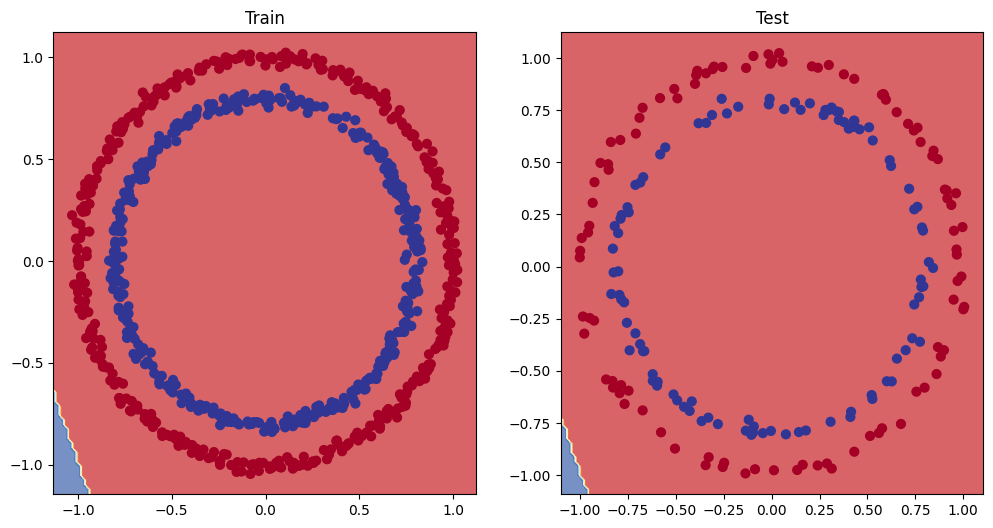

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,x_test,y_test)

### Improving the model

* Add More Layer - give model the chance to learn about the pattern
* Add more hidden units - go from 5 to 10 hidden units
* Fit for longer
* Changing the activation function
* Changing the learning rate
* Changing the loss functions

* `These options are all from a model's perspective because they deal directly with
    the model, rather than the data.`
* `And because these options are all values we (as machine learning engineers and data
    scientists) can change, they are referred as **hyperparameters**.`

<img src="image-20240320-041200.png" width="" align="" />

In [ ]:
total_params = sum(p.numel() for _, p in model_1.named_parameters())
total_params

21

In [ ]:
# Modifying the model by using above discussion

class circleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=10)
        self.layer2 = nn.Linear(in_features=10,out_features=10)
        self.layer3 = nn.Linear(in_features=10,out_features=1)
    
    def forward(self,x):
        z = self.layer1(x)
        z = self.layer2(z)
        z = self.layer3(z)
        return z

In [ ]:
model_2 = circleModel()

In [ ]:
model_2

circleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# creating loss and optimizer 
loss_fn1 = torch.nn.BCEWithLogitsLoss()

optimizer1 = torch.optim.Adam(params = model_2.parameters(),lr=0.02)

In [ ]:
# writing training and testing loop as we have practise a lot that why i am writing direct code with comments
# for refrence you can use above code that we have written with some comments
# just changing the parameter - hypertuning
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):

    model_2.train()
    y_logits = model_2(x_train).squeeze()
    y_pred_label = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn1(y_pred_label , y_train)
    acc = accuracy(y_train,y_pred_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_logits = model_2(x_test).squeeze()
        test_pred_label = torch.round(torch.sigmoid(test_logit))
        test_loss = loss_fn1(test_pred_label,y_test)
        test_accu = accuracy(y_test,test_pred_label)
    
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Train Loss : {loss} | Train accuarcy : {acc} | Test loss : {test_loss} | Test accuracy : {test_acc}")

Epoch : 0 | Train Loss : 0.7581626772880554 | Train accuarcy : 50.74999999999999 | Test loss : 0.6931471824645996 | Test accuracy : 50.0
Epoch : 10 | Train Loss : 0.7581626772880554 | Train accuarcy : 50.74999999999999 | Test loss : 0.6931471824645996 | Test accuracy : 50.0
Epoch : 20 | Train Loss : 0.7581626772880554 | Train accuarcy : 50.74999999999999 | Test loss : 0.6931471824645996 | Test accuracy : 50.0
Epoch : 30 | Train Loss : 0.7581626772880554 | Train accuarcy : 50.74999999999999 | Test loss : 0.6931471824645996 | Test accuracy : 50.0
Epoch : 40 | Train Loss : 0.7581626772880554 | Train accuarcy : 50.74999999999999 | Test loss : 0.6931471824645996 | Test accuracy : 50.0
Epoch : 50 | Train Loss : 0.7581626772880554 | Train accuarcy : 50.74999999999999 | Test loss : 0.6931471824645996 | Test accuracy : 50.0
Epoch : 60 | Train Loss : 0.7581626772880554 | Train accuarcy : 50.74999999999999 | Test loss : 0.6931471824645996 | Test accuracy : 50.0
Epoch : 70 | Train Loss : 0.7581626

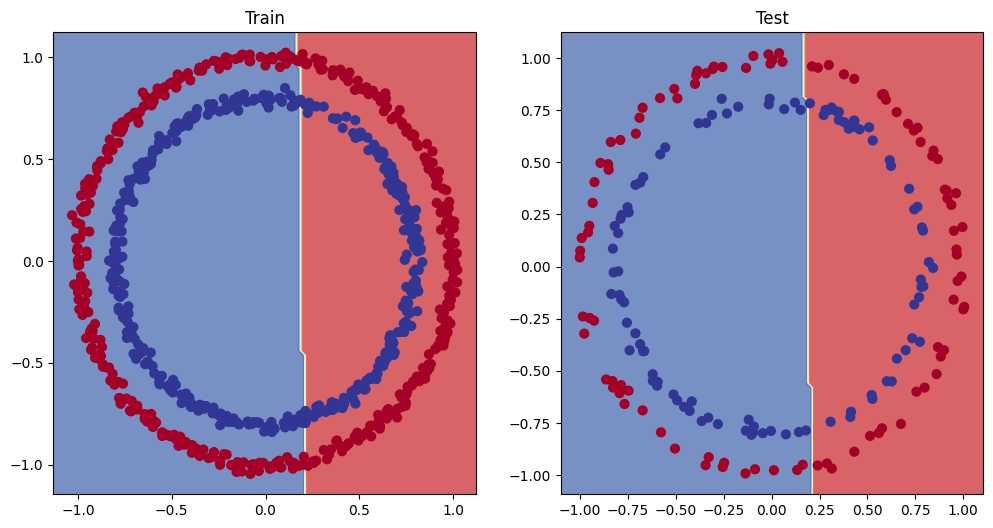

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,x_test,y_test)

### Preparing data to see if our model can fit a straight line
* one way to  troubleshoot to a larger problem is to test out a smaller problem 

In [ ]:
weights = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

x_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weights * x_regression + bias

In [ ]:
print(len(x_regression),len(y_regression))
print(x_regression.ndim,y_regression.ndim)

100 100
2 2


In [ ]:
# train and test split

train_split = int(0.8*len(x_regression))
x_train_regression , y_train_regression , x_test_regression , y_test_regreesion = x_regression[:train_split] , y_regression[:train_split] , x_regression[train_split:] , y_regression[train_split:]

In [ ]:
print(len(x_train_regression),len(y_train_regression))

80 80


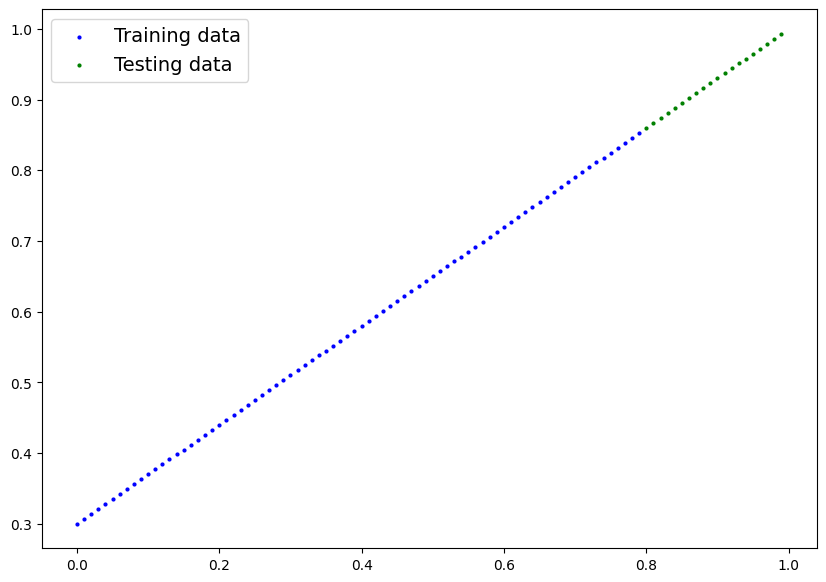

In [ ]:
plot_predictions(x_train_regression,y_train_regression,x_test_regression,y_test_regreesion)

In [ ]:
model_2

circleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Adjusting the model_2

# we will use same architecture as model_1 (but using nn.sequential)

model_3 = nn.Sequential(
    nn.Linear(in_features=1 , out_features=10),
    nn.Linear(in_features=10 , out_features=10),
    nn.Linear(in_features=10 , out_features=1)
)

In [ ]:
model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters() , lr = 0.01)

In [ ]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):

    model_3.train()
    y_pred = model_3(x_train_regression)
    loss = loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_pred = model_3(x_test_regression)
        test_loss = loss_fn(test_pred , y_test_regreesion)
    
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Train Loss : {loss} | Test loss : {test_loss}")

Epoch : 0 | Train Loss : 0.7598584890365601 | Test loss : 0.9110288619995117
Epoch : 10 | Train Loss : 0.4024040102958679 | Test loss : 0.5047394037246704
Epoch : 20 | Train Loss : 0.06007448583841324 | Test loss : 0.10150804370641708
Epoch : 30 | Train Loss : 0.015594890341162682 | Test loss : 0.03230735659599304
Epoch : 40 | Train Loss : 0.030917158350348473 | Test loss : 0.0011067688465118408
Epoch : 50 | Train Loss : 0.031960684806108475 | Test loss : 0.0010762035381048918
Epoch : 60 | Train Loss : 0.03191908448934555 | Test loss : 0.0017018318176269531
Epoch : 70 | Train Loss : 0.030806491151452065 | Test loss : 0.0009658157941885293
Epoch : 80 | Train Loss : 0.030771737918257713 | Test loss : 0.0014975250232964754
Epoch : 90 | Train Loss : 0.029671888798475266 | Test loss : 0.0009232908487319946


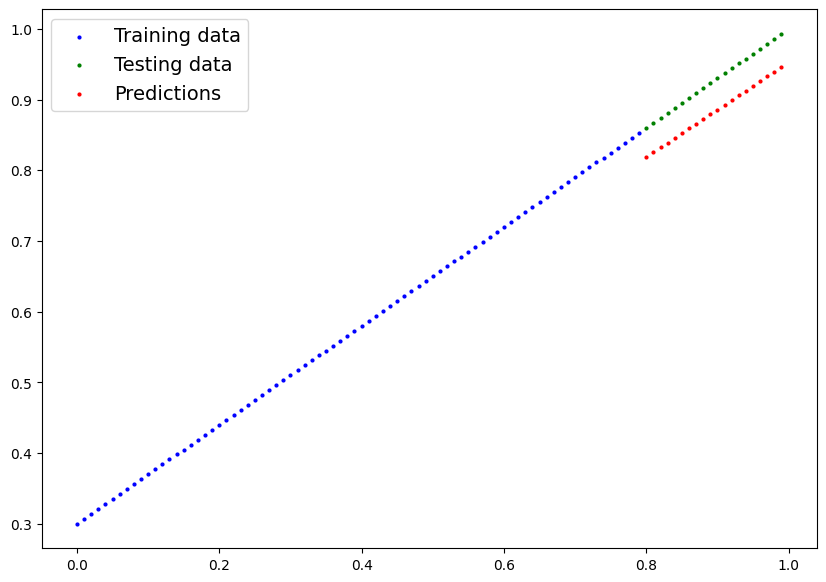

In [ ]:
with torch.inference_mode():
    y_pred = model_3(x_test_regression)

plot_predictions(x_train_regression,y_train_regression.cpu(),x_test_regression.cpu(),y_test_regreesion.cpu(),predictions=y_pred.cpu())

In [ ]:
# the above plot have some capacity to learn

### The missing piece was non-linearity

* ` what pattern could you draw if you were given an in infinite amount of straight and non-straight linear
    or in machine learning terms, an infinite (but really it is finite) of linear and non-linear function`

### 6.1 Recreating non-linear data(red and blue circle)


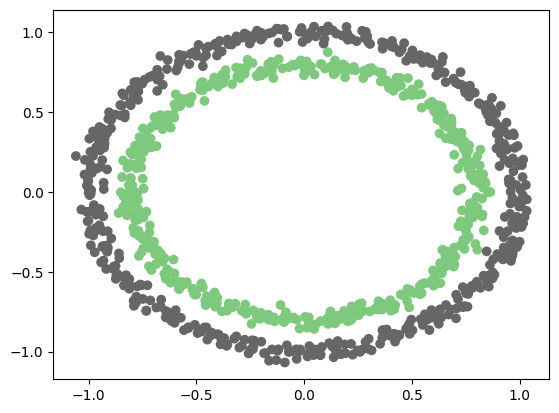

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample = 1000
x , y = make_circles(n_sample , noise = 0.03 , random_state=42)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent_r)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

# turing data into tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.8 , random_state=42)

x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non-linearity

<img src="image-20240324-021947.png" width="" align="" />

In [ ]:
from torch import nn
class CircleModelV3(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10 , out_features = 1)
        self.relu = nn.ReLU() # relu is the non linear activation function
    
    def forward(self,x):
        # where should we put our non linear function ?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_4 = CircleModelV3()

In [ ]:
list(model_4.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [ ]:
# setting up the loss and optimizer
import torch
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_4.parameters() , lr = 0.03)

In [ ]:
# writing training and testing loops

torch.manual_seed(42)
epcohs = 1000

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(x_train).squeeze()
    y_label_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits , y_train)
    train_acc = accuracy(y_train , y_label_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    model_4.eval()

    y_test_logits = model_4(x_test).squeeze()
    test_label = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(y_test_logits,y_test)
    test_acc = accuracy(y_test ,test_label)

    if epoch%10 == 0:
       if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Train Loss : {loss} | Train accuarcy : {train_acc} | Test loss : {test_loss} | Test accuracy : {test_acc}") 


Epoch : 0 | Train Loss : 0.6929463148117065 | Train accuarcy : 50.0 | Test loss : 0.6909562945365906 | Test accuracy : 50.0
Epoch : 10 | Train Loss : 0.6688083410263062 | Train accuarcy : 61.375 | Test loss : 0.6596773266792297 | Test accuracy : 62.5
Epoch : 20 | Train Loss : 0.5967170596122742 | Train accuarcy : 74.0 | Test loss : 0.5805515646934509 | Test accuracy : 80.5
Epoch : 30 | Train Loss : 0.45081862807273865 | Train accuarcy : 84.875 | Test loss : 0.47419875860214233 | Test accuracy : 78.5
Epoch : 40 | Train Loss : 0.252577543258667 | Train accuarcy : 97.5 | Test loss : 0.2708476781845093 | Test accuracy : 97.0
Epoch : 50 | Train Loss : 0.12394487112760544 | Train accuarcy : 98.625 | Test loss : 0.15142259001731873 | Test accuracy : 98.0
Epoch : 60 | Train Loss : 0.06354106962680817 | Train accuarcy : 99.625 | Test loss : 0.09262619912624359 | Test accuracy : 98.5
Epoch : 70 | Train Loss : 0.03553470969200134 | Train accuarcy : 99.875 | Test loss : 0.05532534420490265 | Test 

In [ ]:
model_4.eval()
with torch.inference_mode():
    y_pred_label = torch.round(torch.sigmoid(model_4(x_test).squeeze()))

y_pred_label[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

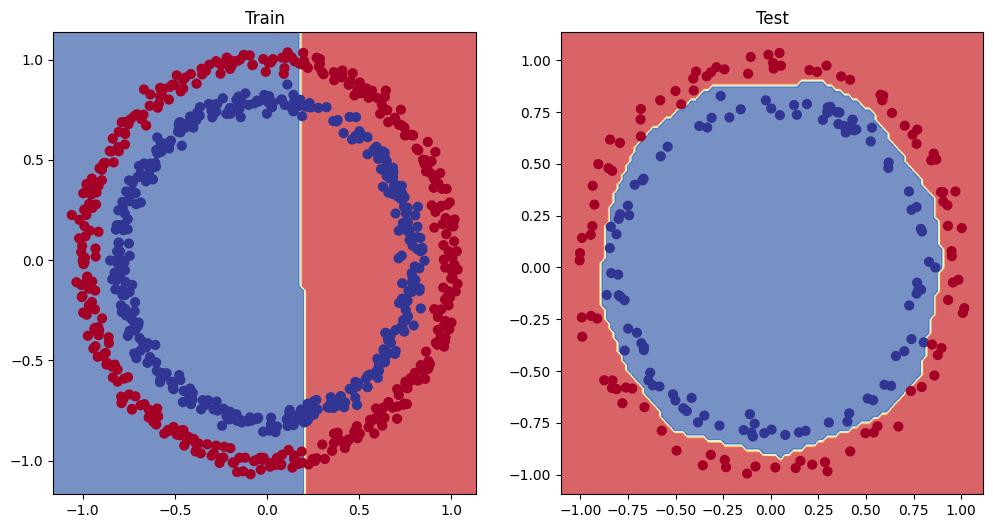

In [ ]:
# plotting decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,x_train , y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,x_test , y_test)

In [ ]:
x = torch.arange(-100,100,5,dtype = torch.float)
x.dtype

torch.float32

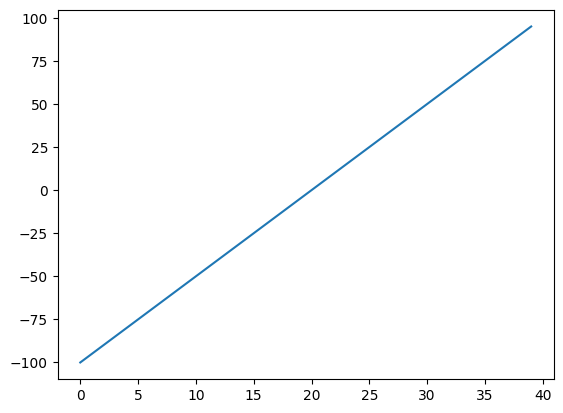

In [ ]:
plt.plot(x)

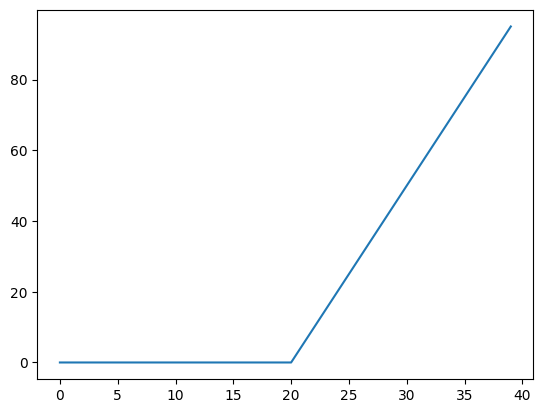

In [ ]:
plt.plot(torch.relu(x))

In [ ]:
def our_relu(x : torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0) , x)

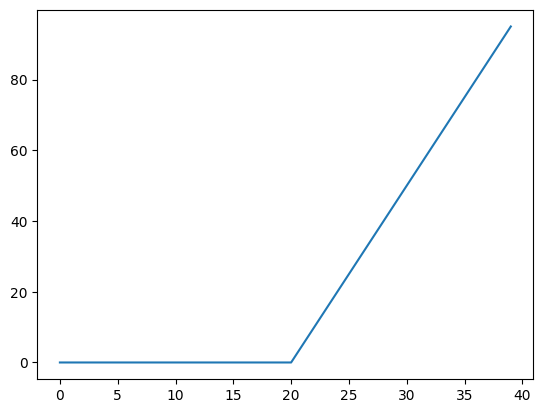

In [ ]:
plt.plot(our_relu(x))

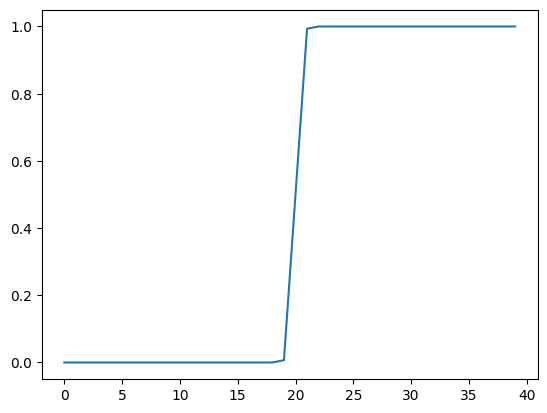

In [ ]:
plt.plot(torch.sigmoid(x))

In [ ]:
def our_sigmoid(x : torch.Tensor) -> torch.Tensor:
    return (1/(1+torch.exp(-x)))

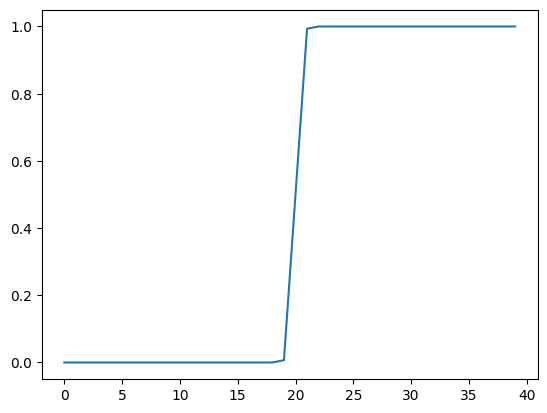

In [ ]:
plt.plot(our_sigmoid(x))

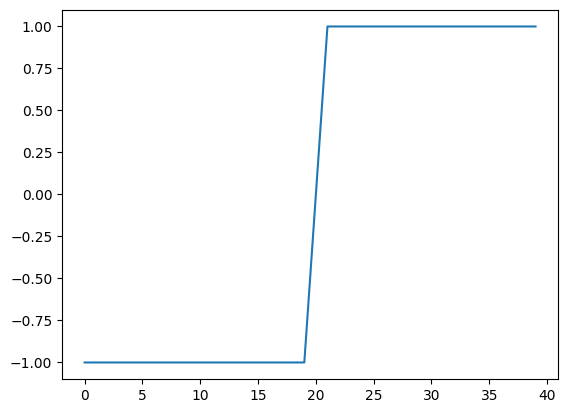

In [ ]:
plt.plot(torch.tanh(x))

<img src="image-20240325-192534.png" width="" align="" />

### Doing Multiclass classification

* Binary Classification => one thing or other (cat or dog) or (spam or not spam)
* Multiclass Classification => more than one thing 

In [ ]:
# creating toy mulit-class dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

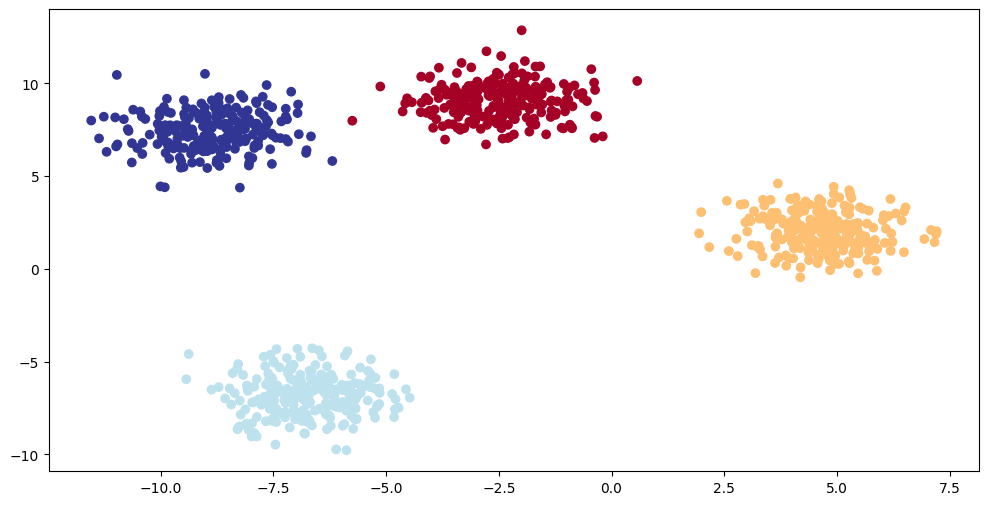

In [ ]:
# setting up the hyper parameter
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multiclass data
x_blob , y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1,
                            random_state = 42)
    
# Turning data into tensors
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# spliting training and testing data
x_blob_train , x_test_blob , y_train_blob , y_test_blob = train_test_split(x_blob,y_blob,train_size = 0.8,random_state=42)

# visualize the data created
plt.figure(figsize = (12,6))
plt.scatter(x_blob[:,0],x_blob[:,1],c = y_blob , cmap = plt.cm.RdYlBu)


In [ ]:
x_blob.shape , y_blob.shape

(torch.Size([1000, 2]), torch.Size([1000]))

### Building a multiclass classification model using pytorch 

In [ ]:
# Device Agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# create your own model by removing relu and do this try

In [ ]:
# Model

class Multiclass(nn.Module):
    def __init__(self,input_features,output_features,hidden_units = 8):
        '''
        Args:
            input_features (int): Number of input feature to the model
            output_features (int): Number of output feature that model produce
            hidden_unit (int): Number of the hidden layer set to 8 
        
        Returns:

        Example:

        '''
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features , out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units , out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units , out_features=output_features),
        )

    def forward(self,x):
        return self.linear_layer_stack(x)

In [ ]:
model_multi_class = Multiclass(input_features=2,
                                output_features=4,
                                hidden_units=16)

In [ ]:
model_multi_class

Multiclass(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=4, bias=True)
  )
)

In [ ]:
# creating a loss and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model_multi_class.parameters() , lr = 0.1)

In [ ]:
# Before training and testing our model we have to take care that our predictions will be logits 
# and this logits is then converted to probabilites and then in to labels

In [ ]:
model_multi_class.eval()
with torch.inference_mode():
    y_logits = model_multi_class(x_blob_train)
y_logits[:10] , y_test_blob[:10]

(tensor([[-0.4829,  0.1151,  0.5406, -0.3420],
         [-0.2080, -0.0788, -0.5935, -0.1746],
         [-0.4782, -0.3042, -0.8632, -0.4407],
         [-0.3498, -0.1707, -0.7109, -0.3509],
         [-0.1712, -0.0561, -0.5905, -0.2588],
         [-0.3619, -0.0666, -0.3415, -0.0050],
         [-0.1856, -0.1151, -0.6478, -0.2862],
         [-0.4121,  0.1297,  0.4170, -0.2968],
         [-0.1946, -0.3209, -0.6739, -0.8364],
         [-0.1788, -0.0832, -0.6166, -0.2692]]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [ ]:
y_pred_prob = torch.softmax(y_logits,dim=1)
print(y_logits[:10])
print(y_pred_prob[:10])

tensor([[-0.4829,  0.1151,  0.5406, -0.3420],
        [-0.2080, -0.0788, -0.5935, -0.1746],
        [-0.4782, -0.3042, -0.8632, -0.4407],
        [-0.3498, -0.1707, -0.7109, -0.3509],
        [-0.1712, -0.0561, -0.5905, -0.2588],
        [-0.3619, -0.0666, -0.3415, -0.0050],
        [-0.1856, -0.1151, -0.6478, -0.2862],
        [-0.4121,  0.1297,  0.4170, -0.2968],
        [-0.1946, -0.3209, -0.6739, -0.8364],
        [-0.1788, -0.0832, -0.6166, -0.2692]])
tensor([[0.1481, 0.2693, 0.4121, 0.1705],
        [0.2596, 0.2954, 0.1766, 0.2684],
        [0.2558, 0.3045, 0.1741, 0.2656],
        [0.2569, 0.3073, 0.1791, 0.2567],
        [0.2706, 0.3036, 0.1779, 0.2479],
        [0.2086, 0.2803, 0.2129, 0.2981],
        [0.2772, 0.2975, 0.1746, 0.2507],
        [0.1631, 0.2803, 0.3736, 0.1830],
        [0.3304, 0.2912, 0.2046, 0.1739],
        [0.2733, 0.3007, 0.1764, 0.2497]])


In [ ]:
print(torch.sum(y_pred_prob[0]))

tensor(1.)


In [ ]:
torch.argmax(y_pred_prob[0])

tensor(2)

In [ ]:
y_pred_label = torch.argmax(y_pred_prob,dim=1)
y_pred_label[:20]

tensor([2, 1, 1, 1, 1, 3, 1, 2, 0, 1, 3, 1, 0, 1, 0, 1, 2, 2, 0, 1])

In [ ]:
y_test_blob[:20]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3])

In [ ]:
# writing training and testing loop

torch.manual_seed(42)
epochs =1000

# if you have cuda availability then you have to trasfer x_blob_train
for epoch in range(epochs):
    # training
    model_multi_class.train()

    y_logits = model_multi_class(x_blob_train)
    y_pred = torch.softmax(y_logits , dim = 1).argmax(dim=1)
    loss = loss_fn(y_logits,y_train_blob)
    accu = accuracy(y_true = y_train_blob,
                    y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing 
    model_multi_class.eval()
    with torch.inference_mode():
        test_logits = model_multi_class(x_test_blob)
        test_pred = torch.softmax(test_logits , dim = 1).argmax(dim=1)
        test_loss = loss_fn(test_logits , y_test_blob)
        test_acc = accuracy(y_true=y_test_blob,
                            y_pred=test_pred)
    
    # printing all the necessary thing 
    if epoch % 10 == 0:
        print(f"Train Loss : {loss} | Train Acc : {accu} | Test Loss : {test_loss} | Test Acc : {test_acc}") 

Train Loss : 0.42975884675979614 | Train Acc : 75.875 | Test Loss : 0.31885382533073425 | Test Acc : 75.5
Train Loss : 0.006510209292173386 | Train Acc : 99.875 | Test Loss : 0.0008928801980800927 | Test Acc : 100.0
Train Loss : 0.002064340515062213 | Train Acc : 99.875 | Test Loss : 0.0002786284894682467 | Test Acc : 100.0
Train Loss : 0.0016334163956344128 | Train Acc : 99.875 | Test Loss : 0.0003431156510487199 | Test Acc : 100.0
Train Loss : 0.0008238984737545252 | Train Acc : 100.0 | Test Loss : 8.749212429393083e-05 | Test Acc : 100.0
Train Loss : 0.0005049370229244232 | Train Acc : 100.0 | Test Loss : 3.035366717085708e-05 | Test Acc : 100.0
Train Loss : 0.0005105856107547879 | Train Acc : 100.0 | Test Loss : 2.4278404453070834e-05 | Test Acc : 100.0
Train Loss : 0.0004635059740394354 | Train Acc : 100.0 | Test Loss : 3.831773574347608e-05 | Test Acc : 100.0
Train Loss : 0.00043845598702318966 | Train Acc : 100.0 | Test Loss : 4.320738298702054e-05 | Test Acc : 100.0
Train Loss 

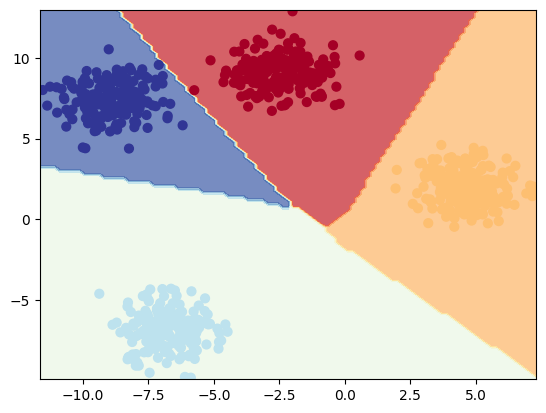

In [ ]:
plot_decision_boundary(model_multi_class,x_blob_train,y_train_blob)

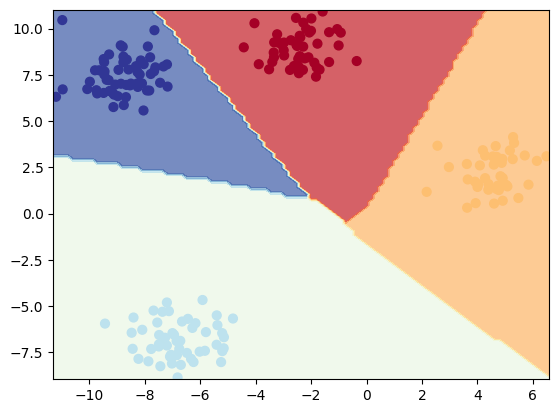

In [ ]:
plot_decision_boundary(model_multi_class,x_test_blob,y_test_blob)

### A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples how many does our model gets right?
* precision 
* recall
* confusion matrix
* f1 score

* Resources - chech out this link https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67ef1406-9293-4fe2-bc45-f0f8ec2662ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>